In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d,PchipInterpolator

In [2]:
epoch = np.datetime64('1970-01-01T00:00:00')

In [3]:
ds = xr.open_dataset('data/processed/stream-coarse-pd4-1.nc')
ds_range = xr.open_dataset('data/processed/range-pd-sync3-1.nc')

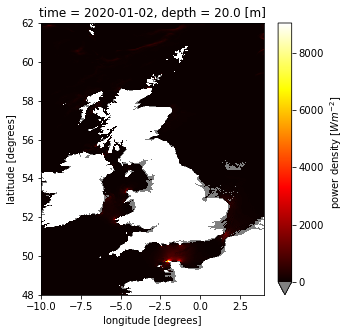

In [4]:
cmap = mpl.cm.get_cmap('hot').copy()
cmap.set_under('gray')

target_time = '2020-01-02T00:00:00.000000000' 
ds.pd.sel(time=target_time,method='nearest').plot(size=5,aspect=1,vmin=0,cmap=cmap)  

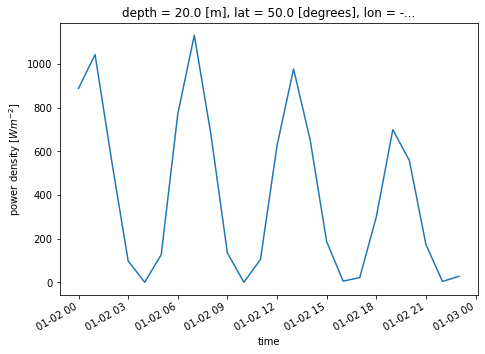

In [5]:
long = -2
lat = 50

subset = ds[['pd']].sel(time=slice('2020-01-01','2020-01-02'))

time = subset.time.values
pd = subset.pd.sel(lon=long,lat=lat,depth=20,method='nearest').values

subset.pd.sel(lon=long,lat=lat,depth=20,method='nearest').plot(size=5)

In [6]:
r_subset = ds_range[['pd']].sel(time=slice('2020-01-01','2020-01-02T23:00:00'))

time_obj = r_subset.time.values
secs_obj = (time_obj-epoch)/1e9 # dtype is timedelta[s] not timedelta[ns]
secs_obj = secs_obj.astype('float64')

In [7]:
secs = (time-epoch)/1e9 # dtype is timedelta[s] not timedelta[ns]
secs = secs.astype('float64')

In [8]:
f_simple = interp1d(secs,pd,kind='cubic')
f_spline = PchipInterpolator(secs,pd)
ft_simple = f_simple(secs_obj)
ft_spline = f_spline(secs_obj)
secs_obj

array([1.5779232e+09, 1.5779241e+09, 1.5779250e+09, 1.5779259e+09,
       1.5779268e+09, 1.5779277e+09, 1.5779286e+09, 1.5779295e+09,
       1.5779304e+09, 1.5779313e+09, 1.5779322e+09, 1.5779331e+09,
       1.5779340e+09, 1.5779349e+09, 1.5779358e+09, 1.5779367e+09,
       1.5779376e+09, 1.5779385e+09, 1.5779394e+09, 1.5779403e+09,
       1.5779412e+09, 1.5779421e+09, 1.5779430e+09, 1.5779439e+09,
       1.5779448e+09, 1.5779457e+09, 1.5779466e+09, 1.5779475e+09,
       1.5779484e+09, 1.5779493e+09, 1.5779502e+09, 1.5779511e+09,
       1.5779520e+09, 1.5779529e+09, 1.5779538e+09, 1.5779547e+09,
       1.5779556e+09, 1.5779565e+09, 1.5779574e+09, 1.5779583e+09,
       1.5779592e+09, 1.5779601e+09, 1.5779610e+09, 1.5779619e+09,
       1.5779628e+09, 1.5779637e+09, 1.5779646e+09, 1.5779655e+09,
       1.5779664e+09, 1.5779673e+09, 1.5779682e+09, 1.5779691e+09,
       1.5779700e+09, 1.5779709e+09, 1.5779718e+09, 1.5779727e+09,
       1.5779736e+09, 1.5779745e+09, 1.5779754e+09, 1.5779763e

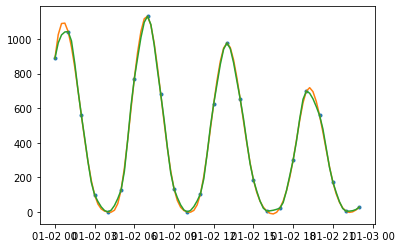

In [9]:
plt.figure()
plt.plot(time,pd,'.')
plt.plot(time_obj,ft_simple)
plt.plot(time_obj,ft_spline)


In [36]:
pd

array([8.8789722e+02, 1.0431498e+03, 5.5820416e+02, 9.8234909e+01,
       3.8780145e-02, 1.2646403e+02, 7.7018420e+02, 1.1317482e+03,
       6.7932935e+02, 1.3403897e+02, 1.7740440e-01, 1.0472018e+02,
       6.2570380e+02, 9.7686475e+02, 6.5375256e+02, 1.8605884e+02,
       5.0935822e+00, 2.1573759e+01, 2.9896469e+02, 6.9883514e+02,
       5.5810907e+02, 1.7358208e+02, 3.9820325e+00, 2.7211946e+01],
      dtype=float32)

In [35]:
ft_simple

array([ 8.87897217e+02,  1.02530169e+03,  1.08963141e+03,  1.09190718e+03,
        1.04314978e+03,  9.54379992e+02,  8.36618603e+02,  7.00886398e+02,
        5.58204163e+02,  4.18965248e+02,  2.91053276e+02,  1.81724434e+02,
        9.82349091e+01,  4.52197190e+01,  1.68291943e+01,  4.59249482e+00,
        3.87801453e-02, -1.59611713e+00,  9.75032705e+00,  4.78473096e+01,
        1.26464027e+02,  2.53880178e+02,  4.16417458e+02,  5.94908068e+02,
        7.70184204e+02,  9.24264944e+02,  1.04391687e+03,  1.11709346e+03,
        1.13174817e+03,  1.08075809e+03,  9.76694790e+02,  8.37053477e+02,
        6.79329346e+02,  5.19713381e+02,  3.69179716e+02,  2.37398273e+02,
        1.34038971e+02,  6.56772914e+01,  2.65109521e+01,  7.64323062e+00,
        1.77404404e-01, -1.68447437e+00,  8.65474474e+00,  4.08909868e+01,
        1.04720177e+02,  2.06022910e+02,  3.35418460e+02,  4.79710774e+02,
        6.25703796e+02,  7.60421829e+02,  8.71770605e+02,  9.47876214e+02,
        9.76864746e+02,  

In [41]:
ft_spline

array([8.87897217e+02, 9.77652605e+02, 1.02374321e+03, 1.04072396e+03,
       1.04314978e+03, 9.89507997e+02, 8.59692889e+02, 7.00369823e+02,
       5.58204163e+02, 4.27527386e+02, 2.89433823e+02, 1.70733116e+02,
       9.82349091e+01, 6.01327835e+01, 2.89066397e+01, 7.79559847e+00,
       3.87801453e-02, 9.88601456e+00, 3.68335092e+01, 7.69899511e+01,
       1.26464027e+02, 2.35060191e+02, 4.16861355e+02, 6.14393900e+02,
       7.70184204e+02, 8.91794311e+02, 1.00884684e+03, 1.09695905e+03,
       1.13174817e+03, 1.08423892e+03, 9.67355274e+02, 8.19563368e+02,
       6.79329346e+02, 5.34660141e+02, 3.71736969e+02, 2.26287392e+02,
       1.34038971e+02, 8.28951077e+01, 4.02388602e+01, 1.10172764e+01,
       1.77404404e-01, 8.34932679e+00, 3.06810951e+01, 6.38967112e+01,
       1.04720177e+02, 1.90946658e+02, 3.34537372e+02, 4.93465393e+02,
       6.25703796e+02, 7.39570293e+02, 8.53726581e+02, 9.41661714e+02,
       9.76864746e+02, 9.44293444e+02, 8.63081926e+02, 7.57983772e+02,
      

In [44]:
assert np.all(ft_spline>=0)

In [ ]:
# time_obj = ds_range.time.values
# secs_obj = (time_obj-epoch)/1e9 # dtype is timedelta[s] not timedelta[ns]
# secs_obj = secs_obj.astype('float64')

In [10]:
lat = 58.7027
latitude_idx = np.where(ds.lat.values==lat)[0][0]
lon = -3.0909090
longitude_idx = np.where(ds.lon.values==lon)[0][0]

subset = ds[['pd']].sel(time=slice('2020-01-02','2020-01-03'))

time = subset.time.values
pd = subset.pd.sel(lon=lon,lat=lat,depth=20,method='nearest').values


r_subset = ds_range[['pd']].sel(time=slice('2020-01-02','2020-01-03T23:00:00'))

time_obj = r_subset.time.values
secs_obj = (time_obj-epoch)/1e9 # dtype is timedelta[s] not timedelta[ns]
secs_obj = secs_obj.astype('float64')

secs = (time-epoch)/1e9 # dtype is timedelta[s] not timedelta[ns]
secs = secs.astype('float64')

f_simple = interp1d(secs,pd,kind='cubic')
f_spline = PchipInterpolator(secs,pd)
ft_simple = f_simple(secs_obj)
ft_spline = f_spline(secs_obj)

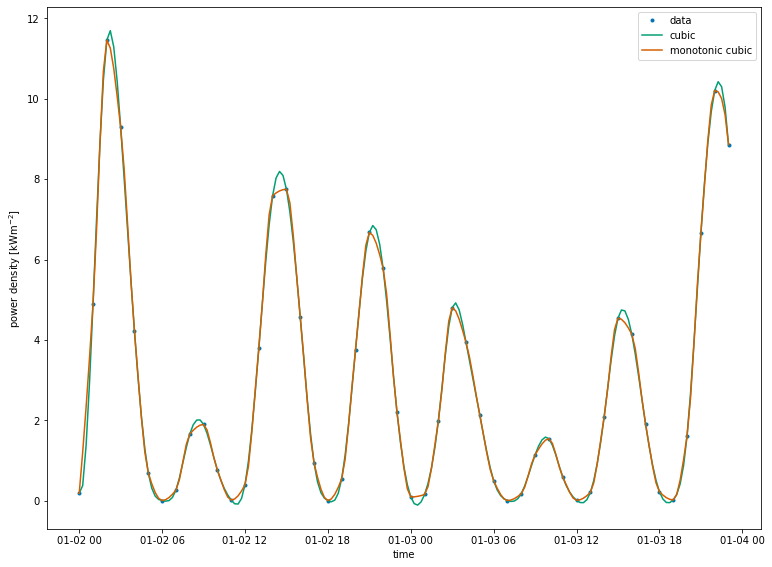

In [15]:
plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(time,pd/1000,'.',label='data')
plt.plot(time_obj,ft_simple/1000,label='cubic')
plt.plot(time_obj,ft_spline/1000,label='monotonic cubic')
plt.xlabel('time')
plt.ylabel('power density [kWm$\mathdefault{^{-2}}$]')
plt.legend()
plt.savefig('figures/for-report/interpolation-pentlandfirth.png')